In [1]:
import numpy as np
import scipy as sp

In [2]:
N_t = 5
T = 2
tau = T / N_t
gamma = 1

Lambda_1 = 1 - 2 * np.exp(2j*np.pi/ N_t * np.arange(N_t)) + np.exp(4j*np.pi/(N_t) * np.arange(N_t))
Lambda_2 = 1 + np.exp(4j*np.pi/N_t * np.arange(N_t))

S1 = np.sqrt(-np.conj(Lambda_2) / Lambda_2)
#S2 = - np.conj(S1)
S2 = -np.sqrt(-Lambda_2 / np.conj(Lambda_2))

m1 = np.real(Lambda_1/Lambda_2)
M1 = np.diag(np.real(Lambda_1/Lambda_2))
m2 = - tau ** 2 /np.conj(Lambda_2)/ np.sqrt(gamma)
M2 = np.diag(- tau ** 2 /np.conj(Lambda_2)/ np.sqrt(gamma))
m3 = tau ** 2 /Lambda_2/ np.sqrt(gamma)
M3 = np.diag(tau ** 2 /Lambda_2/ np.sqrt(gamma))

Gamma = 1j * tau ** 2 / np.sqrt(gamma) * np.abs(1/Lambda_2)

Sigma_1 = m1 + m2 * S1
Sigma_2 = m1 + m3 * S2
# Sigma_1 = np.real(Lambda_1 / Lambda_2) + Gamma # Lambda1 Lambda2^-1 is real
# Sigma_2 = np.conj(Sigma_1)
#Sigma_2 = np.real(Lambda_1 / Lambda_2) - Gamma

S1_mat = np.diag(S1)
S2_mat = np.diag(S2)
Sigma_1_mat = np.diag(Sigma_1)
Sigma_2_mat = np.diag(Sigma_2)
It = np.eye(N_t)

S = np.block([
    [It, S2_mat],
    [S1_mat, It]
])

Sigma = np.block([
    [Sigma_1_mat, np.zeros((N_t, N_t))],
    [np.zeros((N_t, N_t)), Sigma_2_mat]
])

Lambda = np.block([
    [M1, M2],
    [M3, M1]
])

In [21]:
S@np.conj(S.T)

array([[2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j],
       [0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j,
        0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j,
        0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        2.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
        0.+0.j, 2.+0.j]])

In [3]:
l1mat = np.diag(Lambda_1)
l2mat = np.diag(Lambda_2)


In [4]:
from scipy.fft import fft, ifft

In [5]:
It = np.eye(N_t)
A=ifft(l1mat.conj()@fft(It, axis=0), axis=0)
B = fft(l2mat@ifft(It, axis=0), axis=0)

In [19]:
C = ifft(l2mat.conj()@fft(It, axis=0), axis=0)

In [20]:
np.linalg.norm(B-C)

1.1446916827617274e-15

In [6]:
C1 = sp.linalg.circulant([1,-2,1,0,0])
C1.T

array([[ 1, -2,  1,  0,  0],
       [ 0,  1, -2,  1,  0],
       [ 0,  0,  1, -2,  1],
       [ 1,  0,  0,  1, -2],
       [-2,  1,  0,  0,  1]])

In [7]:
np.linalg.norm(A-C1)

8.415866960485804e-16

In [11]:
B

array([[ 1.00000000e+00+5.55111512e-17j,  0.00000000e+00+2.77555756e-17j,
         8.32667268e-17+6.93889390e-17j,  1.00000000e+00-2.08166817e-16j,
        -1.11022302e-16+4.16333634e-17j],
       [-5.55111512e-17+5.40493157e-17j,  1.00000000e+00+9.58473060e-17j,
         0.00000000e+00+2.23342134e-17j,  2.77555756e-17+3.53672269e-17j,
         1.00000000e+00-1.72619538e-16j],
       [ 1.00000000e+00-2.18236841e-16j, -2.22044605e-16+2.22605115e-17j,
         1.00000000e+00+7.22957477e-17j,  0.00000000e+00+7.93940415e-17j,
        -1.00828030e-17+2.31281915e-18j],
       [ 0.00000000e+00+6.63545581e-17j,  1.00000000e+00-1.91296684e-16j,
        -1.11022302e-16+6.36840058e-17j,  1.00000000e+00+7.12368825e-17j,
         1.00828030e-17+1.16513045e-16j],
       [ 5.55111512e-17+4.23218163e-17j,  1.11022302e-16+4.54332908e-17j,
         1.00000000e+00-2.27702906e-16j, -2.77555756e-17+2.21686663e-17j,
         1.00000000e+00+1.21603098e-17j]])

In [9]:
RHS = S @ Sigma
LHS = Lambda @ S

In [10]:
E = LHS-RHS
print(E)
np.linalg.norm(E)

[[0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j
  0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j
  0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j
  0.+0.00000000e+00j]
 [0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j
  0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j
  0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j
  0.+0.00000000e+00j]
 [0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j
  0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j
  0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j
  0.+0.00000000e+00j]
 [0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j
  0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j
  0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j
  0.+0.00000000e+00j]
 [0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j
  0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j
  0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j
  0.+1.11022302e-16j]
 [0.+

1.5700924586837752e-16

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
a = np.arange(5.0,71.0,5)

In [11]:
b = np.array([9.042540594444626878e-01,
2.194904204578775053e-01,
2.074143348600335224e-01,
7.434653270072190401e-02,
8.447904285618772213e-02,
4.036253568006076264e-02,
4.701801862372274182e-02,
2.620697023860175945e-02,
3.060449968470332210e-02,
1.875112255341825768e-02,
2.184258555898753451e-02,
1.426449505896217398e-02,
1.655606546941080018e-02,
1.131967852152349768e-02])

In [24]:
y = a ** -2 *43

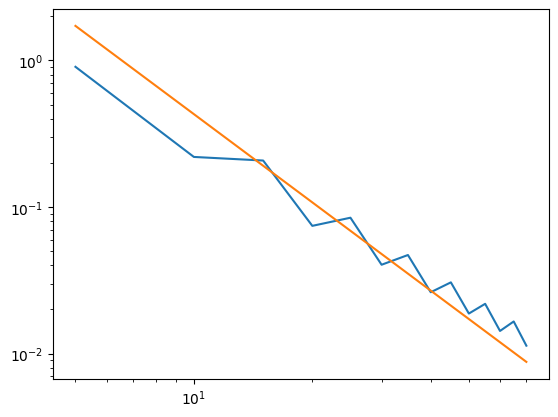

In [25]:
plt.loglog(a,b)
plt.loglog(a,y)